# Word Embedding

Definición: Transformación de palabras a vectores, de forma que puedan servir de entrada a modelos de IA

Los modelos de IA, trabajan con vectores, por lo que es necesario explorar los mecanismos para hacer esta transformación

## Codificación basada en diccionario o en identificadores

Consite en asignar un identificador numerica único a cada palabra, de esta forma ya tendremos un valor númerico que represente las palabras. Por ejemplo

In [ ]:
corpus = "Me gusta mucho tu coche. Voy a comer una manzana. El animal mas famoso en Australia siempre es el canguro"

In [ ]:

# Limpiamos el texto
corpus = corpus.replace(".", "").lower() # Quitamos los puntos y pasamos a minusculas

In [ ]:
# Tokenizamos por espacios en blanco
tokens = [word for word in corpus.split(" ")]
print(tokens)

['me', 'gusta', 'mucho', 'tu', 'coche', 'voy', 'a', 'comer', 'una', 'manzana', 'el', 'animal', 'mas', 'famoso', 'en', 'australia', 'siempre', 'es', 'el', 'canguro']


In [ ]:
# generamos diccionario
dictionary = {}
for indx,token in enumerate(tokens):
  dictionary[token] = indx+1
print(dictionary)

{'me': 1, 'gusta': 2, 'mucho': 3, 'tu': 4, 'coche': 5, 'voy': 6, 'a': 7, 'comer': 8, 'una': 9, 'manzana': 10, 'el': 19, 'animal': 12, 'mas': 13, 'famoso': 14, 'en': 15, 'australia': 16, 'siempre': 17, 'es': 18, 'canguro': 20}


En el ejemplo podemos ver que las codificaciones para las siguientes palabras son las siguientes:
- coche: 5
- manzana: 10
- canguro 20

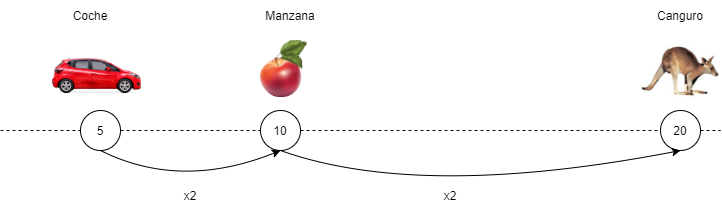


Existen algunos **problemas en esta codigicación**, por ejemplo la relación entre las palabras no parece tener sentido, ya que según la imagen al algoritmo de IA podria inferir:
- Que manzana es el **doble** de coche.
- Que la manzana se encuentra a **medio camino** entre coche y canguro.

## Codificación One-Hot Encoding

Consiste en apartir de el diccionario de palabras únicas de un texto, un vector de longitud igual al tamaño de el diccionario, de forma que pondremos un 1 en el indice de la palabra en cuestion, y un 0 en el resto de palabras. Por ejemplo para la frase **The cat sat on the mat**, tendriamos una matriz parecida a esta

![](https://www.tensorflow.org/text/guide/images/one-hot.png)

In [ ]:
import numpy as np 
texto = "esto es un ejemplo para realizar encoding sobre las palabras de un texto"
tokens = texto.split(" ") # Tokenizamos por espacios
tokens_array = np.array(tokens) # Convertimos en Array usando numpy
rashape_array = tokens_array.reshape(len(tokens_array), 1) # Cambiamos la forma del array poniendo tantas filas como palabras, y con 1 sola columna
rashape_array

array([['esto'],
       ['es'],
       ['un'],
       ['ejemplo'],
       ['para'],
       ['realizar'],
       ['encoding'],
       ['sobre'],
       ['las'],
       ['palabras'],
       ['de'],
       ['un'],
       ['texto']], dtype='<U8')

In [ ]:
from sklearn.preprocessing import OneHotEncoder # Importamos el OneHotEncoder de sklearn
onehot_encoder = OneHotEncoder(sparse=False) # Instanciamos el objeto OneHotEncoder. Sparse = False, implica que rellenamos completamente la matriz, incluso los ceros
onehot_encoded = onehot_encoder.fit_transform(rashape_array) # Realizamos la codificación OneHotEncoder
print(onehot_encoded) # Mostramos la matriz

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Esto genera una matriz cuadrada del tamaño de nuestro diccionario.

Aqui a diferencia de el caso anterior, no existen relaciones asociadas a los vectores, como en el caso anterior, ya que cada vector existe en una dimensión distinta.

Poniendo el caso anterior de e imaginando un vocabulario de solo tres palabras para facilitar la representación tendriamos  para **Coche**,**Manzana** y **Canguro** la siguiente representación vectorial, sonde no hay implicaciones semanticas es decir, todos los vectores se encuentran a la misma distancia unos de otros


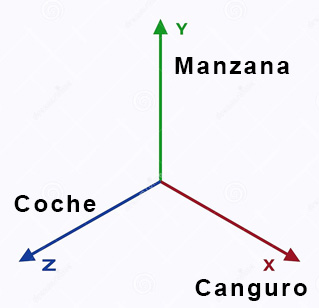


Esta codificación es muy simple y rapida de implementar, pero hay algunos problemas asociados a esta codificación:
- Ocupa muchisimo espacio, si imaginamos un diccionario por ejemplo de unas 4000 palabras, esto implica una matriz de 4000x4000, y vectores de 4000 componentes, es decir que nuestras palabras ahora tienen un tamaño de 4000.
- Todos los valores, excepto uno en cada vector son 0, por lo que desaprovechamos mucho espacio
- El gran tamaño de los vectores, implican mayor complejidad en los modelos que entrenemos a partir de ellos.
- En esta codificación cada palabra, tiene un problema, ya que cada palabra tiene exactamente la misma distancia al resto de palabras,y por lo tanto que perdemos la semantica, por ejemplo, seria deseable que las palabras manzana y pera, tubiesen representaciones de vectores mas proximas, que por ejemplo manzana y coche ya que ambas son frutas

### Word2Vec Embeddings

La idea basica es conseguir representaciones de las palabras en forma de vectores de forma que la distancia vectorial entre palabras con cierta similitud semantica (por ejemplo rey y reina), sea bastante mas proxima a la distancia entre palabras sin relación semantica (por ejemplo rey y coche)

Esto se puede conseguir aplicando cierto orden a las palabras, y ademas reduciendo la dimensionalidad del problema, es decir, donde partiamos de vectores del tamaño del diccionario sin conexión semantica, ahora los compactaremos a un tamaño mucho menor, donde ademas, intentaremos mantener cierta relación semantica

Por poner un ejemplo, imaginemos que tenemos un conjunto de imagenes que representan caras


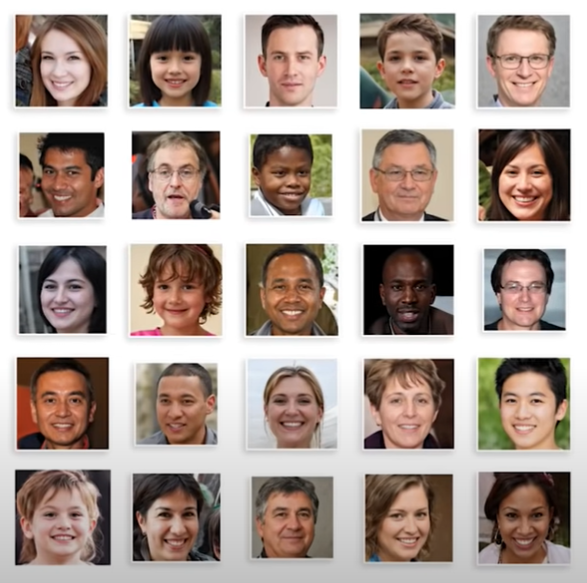

Aqui, cada imagen esta compuesta por pixeles, por lo tanto cada imagen tiene una **dimensionalidad equivalente al numero de pixeles**

Imaginemos que las ordenamos por edad y color de piel, obtendriamos entonces algo similar a esto

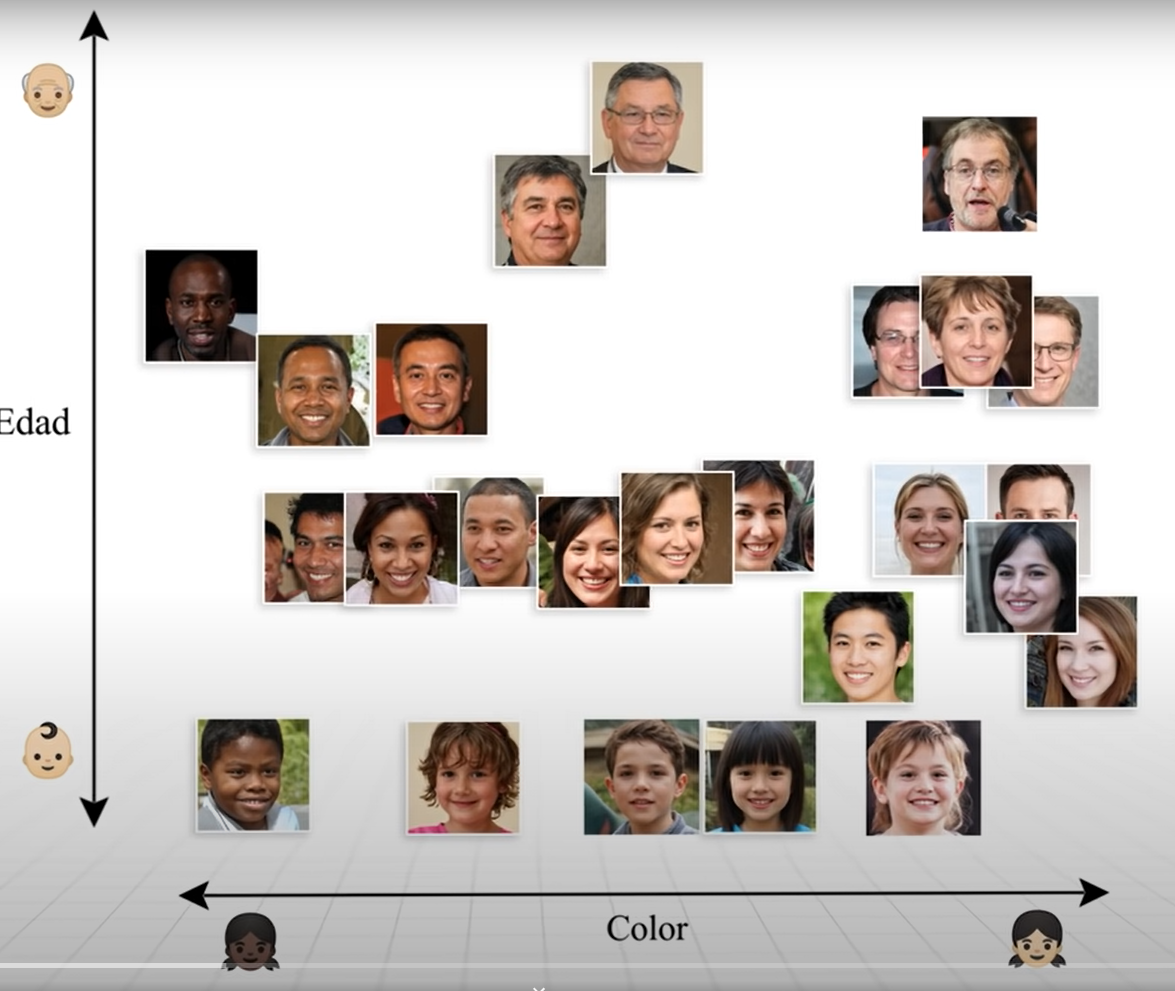

Ahora hemos **reducido la dimesionalidad a 2**, e incluso podemos establecer un orden y encontrar aquellas caras semejantes, al menos segun los criterios de dimensionalidad que hemos escogido, es decir edad y color de piel

Esto es un problema habitual en machine learning, y existe mucha experiencia en generar modelos que reduzcan la dimensionalidad, compactando la información, y que permiten encontrar los elementos con mayor similitud, en función de la reduccion de dimensionalidad que se ha realizado, asi que ¿Por que no hacer algo parecido para **encontrar una representación de las palabras en forma espacio vectoria, que mantenga las distancias entre vectores en función de su similitud semantica**?

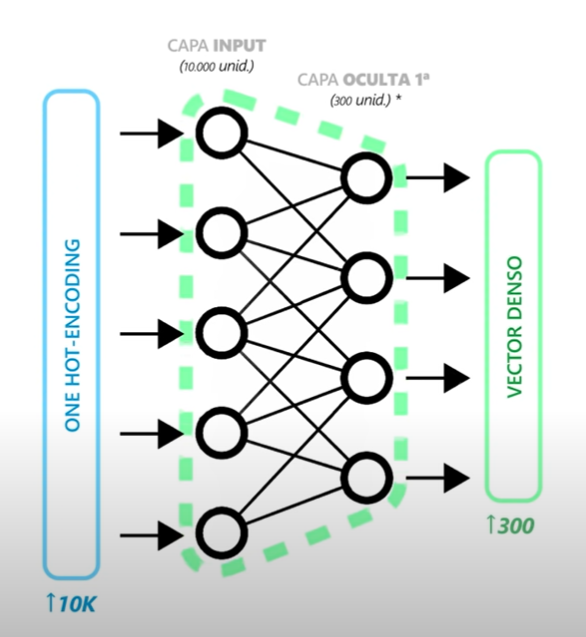

En la imagen podemos ver una **red neuronal**, donde nuestras neuronas de la capa de entrada, tienen el tamaño de el diccionario, en formato de alta dimensionalidad **ONE HOT-ENCODING**, y como salida del modelo, tenemos una capa de salida de una **dimensionalidad sensiblemente menor**, en este caso 300 dimensiones, donde ahora los componentes de los vectores no son todos 0s menos 1 como en la entrada, sino que son valores continuos. De esta forma hemos conseguido **reducir muy significativamente la dimensionalidad**

Por otro lado, podemos entrenar la red de forma que ordene las palabras, en función de la tarea que se pretenda resolver, es decir, crear vectores más proximos entre las palabras, que mejor resuelvan la tarea que queremos abordar. Aqui tenemos dos estrategias:
- **Partir de una red sin entrenamiento**, y entrenarla en el dominio de nuestro problema
- **Partir de una red ya entrenada**, y completar su entrenamiento, con el dominio del problema que queremos abordar

Entrenar una red, en el entendimiento del lenguaje, es una tarea muy costosa, por lo que con casi total seguridad, la mejor estrategia sera siempre **partir de una red ya entrenada**, y mejorarla en nuestro dominio.

Una buena idea parece ser partir de una red entrenada, de proposito general, a partir de textos variados y a priori neutros como por ejemplo la Wikipedia, Fuentes de noticias....

Podemos ver un modelo entrenado de caracter general con visualización online, donde se ha reducido otra vez la dimensionalidad a 3 dimensiones, para poder visualizar el resultado, disponible en este enlace [http://projector.tensorflow.org/](http://projector.tensorflow.org/)

### Word Embeddings PRE Entrenados

La ventaja de estos modelos es que pueden aprovechar conjuntos de datos masivos a los que quizás no tenga acceso, creados con miles de millones de palabras diferentes, con un vasto corpus de lenguaje que captura los significados de las palabras de una manera estadísticamente sólida.

El uso de un modelo previamente entrenado elimina la necesidad de dedicar tiempo a obtener, limpiar y procesar (intensamente) conjuntos de datos tan grandes.

Los modelos preentrenados también están disponibles en otros idiomas además del inglés, lo que abre oportunidades multilingües para sus aplicaciones.

La desventaja de las incrustaciones de palabras previamente entrenadas es que las palabras contenidas en ellas pueden no capturar las peculiaridades del idioma en su dominio de aplicación específico. 

#### Word Embeddings en Spacy

Spacy tiene varios modelos diferentes  de diferentes tamaños disponibles para su uso, con modelos en 7 idiomas diferentes (incluidos inglés, polaco, alemán, español, portugués, francés, italiano y holandés)

In [ ]:
!python -m spacy download es_core_news_sm
!python -m spacy link es_core_news_sm es

     |████████████████████████████████| 16.2 MB 678 kB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-py3-none-any.whl size=16172933 sha256=04824bc791909a49516ce9b135e378a3322bdc806862488c44a89e71ab02b5eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-lucbbuha/wheels/21/8d/a9/6c1a2809c55dd22cd9644ae503a52ba6206b04aa57ba83a3d8
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')


In [ ]:
import spacy # Importación de Spacy
from spacy.lang.es.examples import sentences # Frases en español
import numpy as np # Para gestion de arrays
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore", message=r"\[W007\]", category=UserWarning)
spacy_model = spacy.load('es') # Carga del modelo en español

In [ ]:
frase = input('Introduce una frase para poder trabajar o Intro para elegir una frase por defecto\n')
frase = frase if len(frase)>0  else sentences[0]

doc = spacy_model(frase) # Cargamos la primera frase en doc
print('Frase:',doc.text) # La mostramos
for token in doc: # Iteramos por todas las palabras
  print(f'\t- Palabra: {token.text}, Tipo: {token.pos_}, Función: {token.dep_}') # Y pintamos para cada palabra su Tipo en la oración y su función

Introduce una frase para poder trabajar o Intro para elegir una frase por defecto

Frase: Apple está buscando comprar una startup del Reino Unido por mil millones de dólares.
	- Palabra: Apple, Tipo: PROPN, Función: nsubj
	- Palabra: está, Tipo: AUX, Función: aux
	- Palabra: buscando, Tipo: VERB, Función: ROOT
	- Palabra: comprar, Tipo: VERB, Función: xcomp
	- Palabra: una, Tipo: DET, Función: det
	- Palabra: startup, Tipo: NOUN, Función: obj
	- Palabra: del, Tipo: ADP, Función: case
	- Palabra: Reino, Tipo: PROPN, Función: nmod
	- Palabra: Unido, Tipo: PROPN, Función: flat
	- Palabra: por, Tipo: ADP, Función: case
	- Palabra: mil, Tipo: NUM, Función: nummod
	- Palabra: millones, Tipo: NOUN, Función: obl
	- Palabra: de, Tipo: ADP, Función: case
	- Palabra: dólares, Tipo: NOUN, Función: nmod
	- Palabra: ., Tipo: PUNCT, Función: punct


In [ ]:
type(doc) # Es un objeto del tipo Doc de Spacy

spacy.tokens.doc.Doc

Ahora vamos a crear una matriz, donde calculemos la similitud de todas las palabras 

In [ ]:
matriz_similaridad = []; # Matriz donde almacenaremos las similitudes
tokens_tags = [] # Matriz de palabras
for token1 in doc: # Para cada palabra, la guaramos en token1
  tokens_tags.append(token1.text) # La añado a la lista de palabras
  fila_similaridad = [] # Inicializo una lista vacia, donde guardaremos las similitudes entre token1 y el resto de palabras
  for token2 in doc: # Recorremos todas las palabras, y las guardamos en token2
    fila_similaridad.append(token1.similarity(token2)) # comparamos con la palabra token1 con la palabra token2, y lo guardamos en el array de la fila 
  matriz_similaridad.append(fila_similaridad) # Añadimos la fila, a la matriz

array_matriz_similaridad = np.array(matriz_similaridad) # Convertimos las listas en arrays
print(array_matriz_similaridad) # Pintamos la matriz

[[ 1.00000000e+00  1.91052213e-01  1.67782798e-01  4.59868349e-02
  -7.57589191e-02  3.07423562e-01  1.21713392e-01  4.86185312e-01
   4.90025997e-01  5.16845323e-02 -8.60452652e-02  3.96848619e-02
  -2.25830898e-01  1.57263532e-01 -2.32114613e-01]
 [ 1.91052213e-01  1.00000000e+00  1.35419384e-01  4.65460308e-02
  -5.62769547e-02  6.24313727e-02  4.60267738e-02  1.06389359e-01
   1.70623004e-01  5.20247873e-03 -2.30311885e-01 -8.92242715e-02
  -2.29381517e-01 -8.19828436e-02 -8.57048929e-02]
 [ 1.67782798e-01  1.35419384e-01  1.00000000e+00  2.91519910e-01
  -9.80391130e-02  1.63149163e-01  6.30479455e-02  2.01169729e-01
   3.19426924e-01 -1.75605454e-02 -5.01436589e-04  1.13263443e-01
  -1.05929665e-01  1.83478475e-01 -1.33466572e-01]
 [ 4.59868349e-02  4.65460308e-02  2.91519910e-01  1.00000000e+00
   3.20849717e-01  1.48789018e-01 -8.25199336e-02 -1.63142458e-02
   3.00640259e-02  9.89548117e-02 -2.26598516e-01 -4.01819386e-02
   1.02326073e-01 -2.49700435e-02 -1.03965234e-02]
 [-7

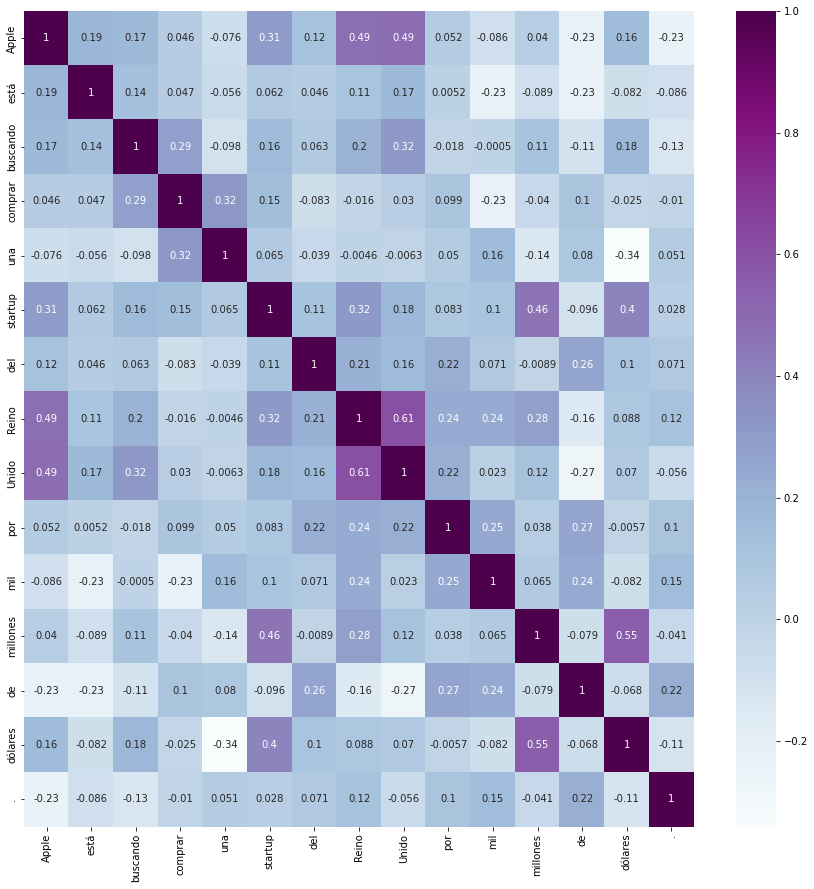

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) # Definimos el tamaño
sns.heatmap(matriz_similaridad, annot=True, xticklabels=np.array(tokens_tags), yticklabels=np.array(tokens_tags), cmap="BuPu") # Usamos seaborn para pintar un heatmat y mostrar las similitudes
plt.show() # Mostramos el heatmap

Lo mas espectacular es que podemos aplicar una cierta **algebra vectorial**, sobre los vectores de las palabras

In [ ]:
import spacy
from scipy import spatial
!python -m spacy download es_core_news_md

     |████████████████████████████████| 78.4 MB 696 kB/s 
  Created wheel for es-core-news-md: filename=es_core_news_md-2.2.5-py3-none-any.whl size=79649484 sha256=95ccc5feb1afa1f857e2154193d898d22c6fb29ac78b7895be4594cd7901750d
  Stored in directory: /tmp/pip-ephem-wheel-cache-l66__8r4/wheels/d8/f5/92/ee8a4f74fac67775fbc0314b1c9ae4694f4180437f6fc3dd1c
Successfully built es-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
print(len(nlp.vocab)) # Numero de palabras en el vocabualrio
print(len(nlp.vocab.vectors)) # Numero de vectores

1340241
684831


Por ejemplo, podriamos coger el vector de rey, restar el vector de hombre, sumar el de mujer, y obtener reina

**v(king)-v(man)+v(woman) = v(queen)**

![](https://pbs.twimg.com/media/Dv61a0FW0AEy1Q1.jpg)

Vectores para rey, hombre y mujer

In [ ]:
# Words to Vectors
king = nlp(u'king').vector
man = nlp(u'man').vector
woman = nlp(u'woman').vector

Operación vectorial **v(king)-v(man)+v(woman)**

In [ ]:
new_vector = king-man+woman
new_vector

array([ 5.14087021e-01, -2.78459996e-01,  2.42767006e-01,  4.54899669e-02,
       -2.59425014e-01, -3.19999963e-01,  3.23920012e-01, -6.71030045e-01,
       -9.98499990e-02,  1.91499996e+00, -5.68080008e-01, -2.74451017e-01,
       -1.49906695e-01,  8.01083148e-02, -2.34764010e-01, -1.10950008e-01,
       -1.02593988e-01,  8.53819966e-01, -2.68564999e-01,  3.85140002e-01,
       -1.36149988e-01,  6.35029972e-01, -7.62044966e-01, -2.52770007e-01,
       -6.75969958e-01,  3.89851004e-01, -2.89680034e-01,  1.75860003e-01,
       -5.16229987e-01,  5.21373034e-01, -1.89909995e-01,  6.73759937e-01,
        1.17550008e-01, -4.69896019e-01,  5.88999987e-01,  1.29447982e-01,
       -5.71900010e-01, -5.47450066e-01, -4.84210014e-01,  5.85503951e-02,
        4.82379973e-01, -2.86769986e-01, -2.01718003e-01, -4.74729985e-01,
        3.43068987e-01, -2.28827983e-01, -1.76439017e-01,  6.05450034e-01,
        2.07139999e-01, -2.89762974e-01, -7.63288975e-01,  4.37090009e-01,
       -2.06220001e-01, -

Crear la función distancia coseno

In [ ]:
from scipy import spatial
similitud_coseno = lambda vec1,vec2 : 1-spatial.distance.cosine(vec1,vec2) # Creo un afuncion para la distancia coseno entre dos vectores

![](https://www.tyrrell4innovation.ca/wp-content/uploads/2021/06/rsz_jenny_du_miword.png)

Ahora vamos a crear una función que nos permita calcular la similitud de nuestro nuevo vector, con el resto de palabras del diccionario y que nos pinte las coincidencias mas cercanas en pantalla.

In [ ]:
def busca_palabras_similares(palabra,vector, numero):
  similaridades = [] # Vector de distancias

  for word in nlp.vocab: # Para todas las palabras del diccionario
      if word.has_vector and word.is_alpha and word.is_lower: # Si tenen vector, son alfanumericas y estan en mayusculas
          similaridades.append((similitud_coseno(vector,word.vector),word.text)) # Añado a la lista de dimilitud la tupla (similutud, palabra)
  for similarity,word in  sorted(similaridades,reverse=True)[:numero+1]:
    if palabra.lower() != word.lower():
      print(word,similarity)

In [ ]:
busca_palabras_similares('king',new_vector,10)

queen 0.7880843877792358
prince 0.6401076912879944
kings 0.6208544373512268
princess 0.6125636100769043
royal 0.5800970792770386
throne 0.5787012577056885
queens 0.5743793845176697
monarch 0.563362181186676
kingdom 0.5520980954170227
empress 0.528952956199646


Podemos cer que la palabra más similar es reina, lo cual es totalmente coherente con la operación vectorial que hemos realizado,  **v(king)-v(man)+v(woman)**, por lo que podemos inferir la existencia de cierta algebra vectorial 

### Word Embeddings en Gemsim

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 79.9 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim
import gensim.downloader as api # API para descargar modelos preentrenados
from gensim.models import KeyedVectors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
PATH_MODELOS = '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/models'
MODEL_NAME = 'word2vec-google-news-300'

In [ ]:
try:
  print(f'Trying to download the model {MODEL_NAME} from drive file')
  #model = gensim.models.Word2Vec.load(f'{PATH_MODELOS}/{MODEL_NAME}.w2v')
  model = KeyedVectors.load(f'{PATH_MODELOS}/{MODEL_NAME}.w2v')
  print(f'Loaded model {MODEL_NAME} from Drive complete')
except Exception as e:
  print('Error in load model from Drive',e)
  model = api.load(MODEL_NAME) # Descarga de modelo preentrenado a partir de noticias Google
  print(f'Loaded model {MODEL_NAME} from API')
  model.save(f'{PATH_MODELOS}/{MODEL_NAME}.w2v') # Guardar el modelo en drive
  print(f'Saved the model {MODEL_NAME} in drive')


Ahora usando el modelo, vamos a calcular la similitud entre distintas palabras

Para palabras similares o del mismo campo semántico o conceptual, podemos ver resultados de los siguientes ejemplos

In [ ]:
# Analizamos la similitud de sinonimos
model.similarity("woman", "lady") # Vemos que es elevada

In [ ]:
# Analizamos la similitud de antonimos
model.similarity("love", "hate") # Tambien es elevada, por que pertenecen a un mismo grupo de conceptos

In [ ]:
# Por ejemplo palabras relacionadas, que pertenecen a un mismo contexto
model.similarity("mother", "father") # Elevada por compartir contexto

Podemos ver tambien sesgos en el modelo, por ejemplo la palabra mujer se ajusta muy bien a madre o a enfermera, pero mucho peor a ingeniero

In [ ]:
# Similitud muy alta en el rol de mujer y madre
model.similarity("woman", "mother")

In [ ]:
# Tambien cuando relacionamos mujer con profesiones tipicamente femeninas
model.similarity("woman", "nurse")

In [ ]:
# Y obtenemos una similitud muy baja cuando lo relacionamos con profesiones tipicamente masculinas
model.similarity("woman", "engineer")

In [ ]:
# Similar a cuando relacionamos mujer con patata, que obviamente no tienen practicamente ninguna relación
model.similarity("mother", "potato")

Podemos inferir de esto, que nuestro modelo tiene cierto sesgo sexista, lo cual es "normal", ya que esta aprendiendo de fuentes de noticias disponibles en Google, que podemos pensar que contiene ese mismo sesgo, ya que esta presente en el lenguaje humano.

Ahondando en esta idea vamos a explorar las similitudes de distintas palabras asociadas a profesiones, y ver su similitud con los terminos **hombre** y **mujer**, en relación a su similitud con otra palabra fuera del contexto, que usaremos como palabra de control, en este caso **pajaro**

In [ ]:
professions = [
"potato",              
"wife",
"husband",
"child",
"queen",
"secretary",
"king",
"hairdresser",
"beautician",
"nurse",
"teacher",
"engineer",
"scientist",
"millionaire",
"boss",
"president",]

for p in professions:
    simility_man = model.similarity("man", p)
    simility_woman = model.similarity("woman", p)
    print(f'Professions: {p}\n\t{("--> " if simility_man>simility_woman else "")}Man similitude: {simility_man}  \n\t{("--> " if simility_woman>simility_man else "")}Woman similitude:{simility_woman}')

Ahora vamos a hacer **operaciones vectoriales**, con las palabras

Una buena forma pensar en ellas es por ejemplo **A es a B como C es X" haciendo A + C - B**. Por ejemplo:<br>
**Hombre(A) --> Rey(B)<br>Mujer(C)   --> Reina(D)**

Entonces **Reina(D) = Rey(B) + Mujer(C) - Hombre(A)**

Probemos:

In [ ]:
# man is to king as woman is to ___? D = B+C-A
model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)

In [ ]:
# burger is to USA as ___ is to Mexico?  --> A + D 
model.most_similar(positive=["burger", "Mexico"], negative=["USA"], topn=1)

In [ ]:
# king is to throne as judge is to _
model.most_similar(positive=["judge", "throne"], negative=["king"], topn=1)

In [ ]:
# giant is to tall as genius is to _
model.most_similar(positive=["tall", "genius"], negative=["giant"], topn=1)
# exceptionally_gifted = Excepcionalmente dotado

In [ ]:
# French is to France as Spanish is to _
model.most_similar(positive=["France", "Spanish"], negative=["French"], topn=1)

In [ ]:
#  bad is to good as sad is to _
model.most_similar(positive=["sad","good"], negative=["bad"], topn=1)

In [ ]:
# nurse is to hospital as teacher is to _
model.most_similar(positive=["teacher","hospital"], negative=["nurse"], topn=1)

In [ ]:
# planet is to universe as house is to _
model.most_similar(positive=["universe","house"], negative=["planet"], topn=1)

#### Entrenando nuestro propio modelo Gensim

La idea ahora es entrenar un modelo sobre un dominio específico.
Para ello vamos a usar dialogos transcritos de **Los Simpsons**

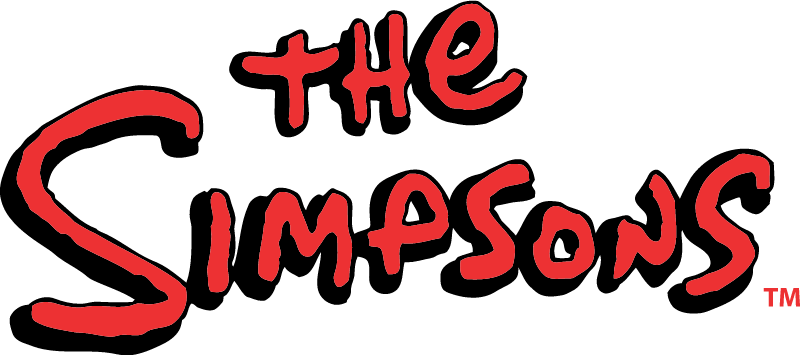

Importaciones

In [1]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import numpy as np

import spacy  # For preprocessing
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

Leemos datos de un dataset de los simpson

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
PATH_DATA= '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/data'
DATASET_NAME = 'simpsons_dataset.csv'

Mounted at /content/drive


In [3]:
df = pd.read_csv(f'{PATH_DATA}/{DATASET_NAME}')

In [4]:
df.head()

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


In [6]:
df.shape

(158314, 2)

Revisamos los valores nulos

In [7]:
df.isnull().sum()

raw_character_text    17814
spoken_words          26459
dtype: int64

Borramos los nulos

In [8]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

raw_character_text    0
spoken_words          0
dtype: int64

Limpiamos el conjunto de datos Lematizando y removiendo Stop Words

In [9]:
import spacy
nlp = spacy.load('en', disable=['ner', 'parser']) # disabdesabilitamos reconocimiento de entidades nombras para que funcione mas rápido

# Creamos una funcion para hacer la limpieza
def cleaning(doc):
    # Lematizamos y borramos Stop Words
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop] # Para todo el documento, , filtramos las Stop Words y extramenos el lema insertandolo en una nueva lista 
    # Word2Vec usa el contexto de las palabras para inferir la representación vectorial de las palabras
    # Si la palabra es muy corta (2 letras), practicamente no añade nada al contexto
    # Podemos quitarla para agilizar el proceso de entrenamiento
    if len(txt) > 2:
        return ' '.join(txt)


Borramos los caracteres no alfanuméricos de el texto de cada personaje

In [10]:
import re
# Hacemos una tripleta, donde el primer agumento es la expresión regular, es segundo el separador de palabras, y el tercero la funcion para extraer filas
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

Usamos el **spacy.pipe()** para mejorar la velocidad del proceso

In [11]:
from time import time
t = time() # Lo usamos para calcular el tiempo

# invocamos pipe, para que aplique la funcion de limpieza, generar batch de 5000, e indicar que no use threads
txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 1.3 mins


Ponemos el resultado resultado en un dataframe eliminando tambien duplicados y vacios

In [12]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(85964, 1)

In [ ]:
df_clean.head()

El uso de **Bigramas** (conjuntos de 2 palabras), al usar el paquete  **gensim.models.phrases** de **Gensim** detecta automaticamente frases comunes (bigramas) desde la lista de sentencias


In [ ]:
from gensim.models.phrases import Phrases, Phraser

Como Phrases() toma una lista (de palabras) de listas (de frases), es necesario contruir esta lista de listas

In [ ]:
sent = [row.split() for row in df_clean['clean']]

In [ ]:
print(sent[:10])

Ahora Creamos las frases relevantes de la lista de oraciones:

In [ ]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [ ]:
bigram = Phraser(phrases)

sentences = bigram[sent]

In [ ]:
sentences = bigram[sent]

**Palabras mas frecuentes**

Principalmente para verificar la lematización la eliminación de Stop Word y la addicion de bibramas

In [ ]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

**Entrenamiento del modelo**

![](http://mccormickml.com/assets/word2vec/skip_gram_net_arch.png)

In [ ]:
import multiprocessing

from gensim.models import Word2Vec

Vamos a separar el proceso de entrenamiento en 3 pasos, para mayor claridad:

- **Word2Vec:** Primero configuraremos los parametros, pero dejamos el modelo sin inicializar

In [ ]:
cores = multiprocessing.cpu_count() # Cuenta el numero de cores

Parametros: 

- **min_count** = Entero - Es el umbral de frecuencia de las palabras por el cual ignorara todas las palabras que no lo superen - rango(2, 100)
- **window** = Entero - Es el tamaño de la ventana que usara para tener el contexto, por ejemplo si es 5, tendra en cuenta las 5 palabras anteriores y las 5 posteriores - rango(2, 10)
- **size** = Entero - Dimension de los vectores que generara. - rango(50, 300)
- **sample** = Decimal - Es el umbral para palabras de alta frecuencia que son muestradas. Tiene una alta influencia en el resultado. - (0, 1e-5)
- **alpha** = Decimal - El ratio de aprendizaje, es decir lo rapido que aprende el algoritmo - (0.01, 0.05)
- **min_alpha** = Decimal - Es el umbral que represnta la tasa de aprendizaje minima antes de parar el entrenamiento. Para configurarlo: alpha - (min_alpha * epochs) ~ 0.00
- **negative** = Entero - Si > 0, se usará un muestreo negativo, el Si < 0 para negativo especifica cuántas "palabras de ruido" deben usarse. Si se establece en 0, no se utiliza ningún muestreo negativo. - (5, 20)
- **workers** = Entero - Numero de procesos paralelos usados para entrenar

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

- **Construccion de tabla de vocabulario:** Word2Vec requiere que construyamos la tabla de vocabulario (simplemente digiriendo todas las palabras y filtrando las palabras únicas, y haciendo algunos conteos básicos sobre ellas)

In [ ]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

- **Entrenamiento del modelo**: Requiere los siguientes parámetros
  - **total_examples** = Entero - Número de frases;
  - **epochs** = int - Número de iteraciones (epochs) sobre el corpus - [10, 20, 30]

In [ ]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

**Exporando los resultados**

- **Encontrar las palabras más parecidas**

<img src="https://vignette.wikia.nocookie.net/simpsons/images/0/02/Homer_Simpson_2006.png/revision/latest?cb=20091207194310" alt="drawing" width="100"/>

In [ ]:
w2v_model.wv.most_similar(positive=["homer"])

Es importante tener en cuenta en que contexto aparece la palabra **"homer"**, dentro del corpus. El corpus son frases que **otros**, dicen de el, por lo que parece razonable encontrar las palabras **marge** o **wife** o tambien algunas descipciones como **rude** o **crummy** y tambien expresiones como gee ,sorry o worry

<img src="https://vignette.wikia.nocookie.net/simpsons/images/0/0b/Marge_Simpson.png/revision/latest?cb=20180626055729" alt="drawing" width="100"/>

In [ ]:
w2v_model.wv.most_similar(positive=["marge"])

<img src="https://vignette.wikia.nocookie.net/simpsons/images/6/65/Bart_Simpson.png/revision/latest?cb=20180319061933" alt="drawing" width="100"/>

In [ ]:
w2v_model.wv.most_similar(positive=["bart"])

<img src="https://static.wikia.nocookie.net/simpson-maniacos/images/c/c7/Moes.gif/revision/latest/scale-to-width-down/325?cb=20100516205200&path-prefix=es" alt="drawing" width="100"/>

In [ ]:
w2v_model.wv.most_similar(positive=["moe"])

- **Analizar similaridades entre palabras**

In [ ]:
w2v_model.wv.similarity("moe", 'tavern')

In [ ]:
w2v_model.wv.similarity('maggie', 'baby')

In [ ]:
w2v_model.wv.similarity('bart', 'nelson')


- **Entontra la palabra que no encaja**

In [ ]:
w2v_model.wv.doesnt_match(['jimbo', 'moe', 'nelson'])


In [ ]:
w2v_model.wv.doesnt_match(['barney', 'burt', 'milhouse'])

In [ ]:
w2v_model.wv.doesnt_match(['homer', 'patty', 'selma'])

- **Operaciones vectoriales**

In [ ]:
# Bart --> Man
#  ?   --> Woman
w2v_model.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)

**Visualización**

Para visulaizar el vocabulario es necesario reducir la dimensionalidad desde las 300 componentes de las palabras a 2

Para ello usamos el algotimo t-SNE de reducción no lineal de dimensionalidad

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE